# IMDB Movies - Exploratory Data Analysis (EDA)

This notebook contains comprehensive EDA of the IMDB movies dataset, covering:
1. Rating Distribution
2. Votes Distribution (Popularity)
3. Ratings vs. Votes
4. Ratings by Genre
5. Ratings by Decade
6. Number of Movies per Decade
7. Genre Evolution Over Time
8. Runtime vs. Rating

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


In [10]:
# Load the processed data
df = pd.read_csv('../data/processed/imdb_movies_processed.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (336000, 32)

Column names: ['tconst', 'primaryTitle', 'originalTitle', 'titleType', 'isAdult', 'startYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes', 'decade', 'primaryGenre', 'numGenres', 'logVotes', 'bayes_rating', 'runtime_bin', 'genre_Action', 'genre_Adult', 'genre_Adventure', 'genre_Animation', 'genre_Biography', 'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_Horror', 'genre_Other', 'genre_Romance', 'genre_Thriller', 'genre_Unknown']

First few rows:


,tconst,primaryTitle,originalTitle,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,...,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Other,genre_Romance,genre_Thriller,genre_Unknown
0,tt0000009,Miss Jerry,Miss Jerry,movie,0,1894.0,45.0,Romance,5.2,231.0,...,False,False,False,False,False,False,False,True,False,False
1,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,movie,0,1897.0,100.0,"Documentary,News,Sport",5.3,578.0,...,False,True,False,False,False,False,False,False,False,False
2,tt0000335,Soldiers of the Cross,Soldiers of the Cross,movie,0,1900.0,40.0,"Biography,Drama",5.5,64.0,...,False,False,False,False,False,False,False,False,False,False
3,tt0000502,Bohemios,Bohemios,movie,0,1905.0,100.0,Unknown,3.1,25.0,...,False,False,False,False,False,False,False,False,False,True
4,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,movie,0,1906.0,70.0,"Action,Adventure,Biography",6.0,1039.0,...,False,False,False,False,False,False,False,False,False,False


## Rating Distribution
**Purpose**: Core measure of quality perception  
**Insight**: Shows audience rating bias (IMDb typically peaks around 6–7)

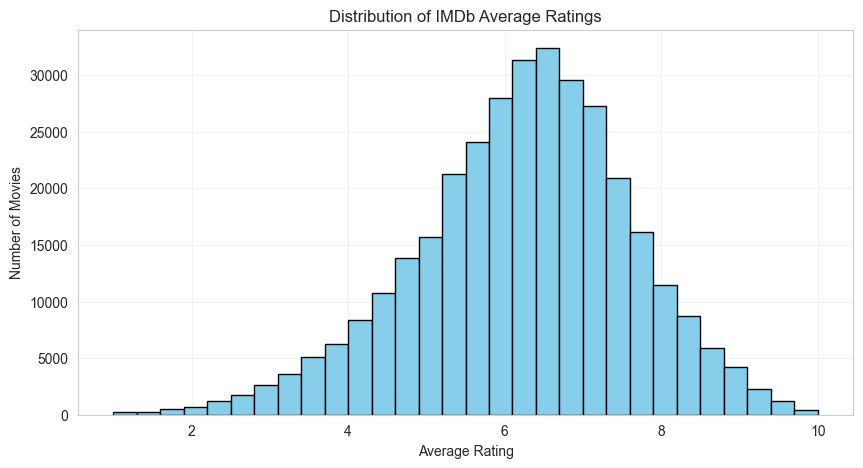

In [23]:
plt.figure(figsize=(10,5))

plt.hist(df['averageRating'].dropna(), bins=30, color='skyblue', edgecolor='black')

plt.title("Distribution of IMDb Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Number of Movies")
plt.grid(alpha=0.25)

plt.show()


## Votes Distribution (Popularity)
**Purpose**: Shows audience engagement  
**Insight**: Reveals skew — few movies get massive attention

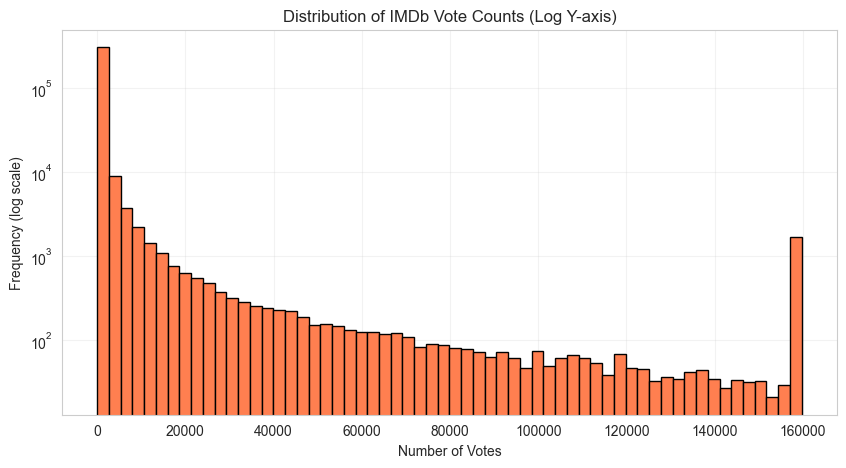

Vote Count Summary:
count    336000
mean       2489
std       14532
min           5
25%          20
50%          64
75%         325
max      159752
Name: numVotes, dtype: int64

Top 10 Most Voted Movies:
                          primaryTitle  startYear    numVotes  averageRating
2964                        Metropolis     1927.0  159752.145            8.2
4911                       City Lights     1931.0  159752.145            8.5
5113                                 M     1931.0  159752.145            8.3
8620                      Modern Times     1936.0  159752.145            8.5
9689   Snow White and the Seven Dwarfs     1937.0  159752.145            7.6
10885               Gone with the Wind     1939.0  159752.145            8.2
11411                 The Wizard of Oz     1939.0  159752.145            8.1
11696               The Great Dictator     1940.0  159752.145            8.4
11949                        Pinocchio     1940.0  159752.145            7.5
11982                     

In [25]:
plt.figure(figsize=(10,5))

plt.hist(df['numVotes'].dropna(), bins=60, edgecolor='black', color='coral')
plt.yscale('log')

plt.title("Distribution of IMDb Vote Counts (Log Y-axis)")
plt.xlabel("Number of Votes")
plt.ylabel("Frequency (log scale)")
plt.grid(alpha=0.25)

plt.show()

print("Vote Count Summary:")
print(df['numVotes'].describe().astype(int))

print("\nTop 10 Most Voted Movies:")
print(df.nlargest(10, 'numVotes')[['primaryTitle','startYear','numVotes','averageRating']])


## Ratings by Genre
**Purpose**: Identifies audience preferences  
**Insight**: Reveals which genres consistently perform better

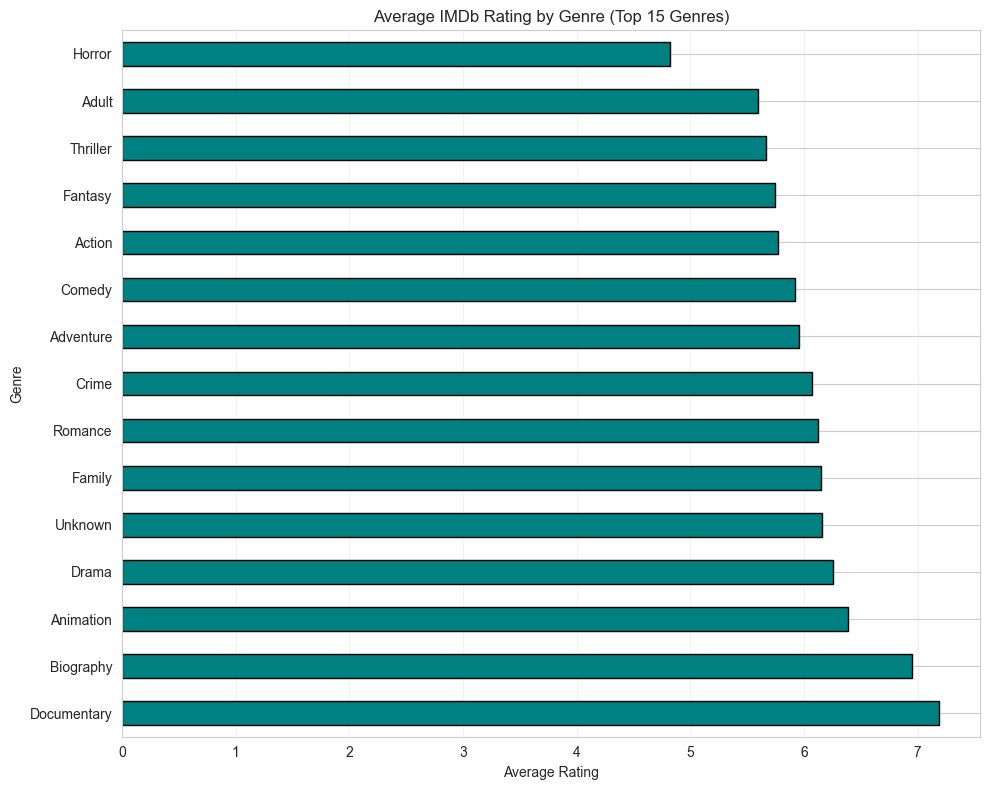

Mean Rating by Genre (Top 15 Genres):
primaryGenre
Documentary    7.19
Biography      6.95
Animation      6.39
Drama          6.26
Unknown        6.16
Family         6.15
Romance        6.12
Crime          6.07
Adventure      5.96
Comedy         5.92
Action         5.77
Fantasy        5.75
Thriller       5.67
Adult          5.60
Horror         4.82
Name: averageRating, dtype: float64


In [26]:
# Compute average rating per genre (Top 15 genres)
top_genres = df['primaryGenre'].value_counts().head(15).index
genre_stats = (
    df[df['primaryGenre'].isin(top_genres)]
    .groupby('primaryGenre')['averageRating']
    .mean()
    .sort_values(ascending=False)
    .round(2)
)

plt.figure(figsize=(10,8))
genre_stats.plot(kind='barh', color='teal', edgecolor='black')

plt.title("Average IMDb Rating by Genre (Top 15 Genres)")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.grid(axis='x', alpha=0.25)

plt.tight_layout()
plt.show()

print("Mean Rating by Genre (Top 15 Genres):")
print(genre_stats)


## Ratings by Decade
**Purpose**: Captures temporal trends  
**Insight**: Shows if audience perception shifts over time

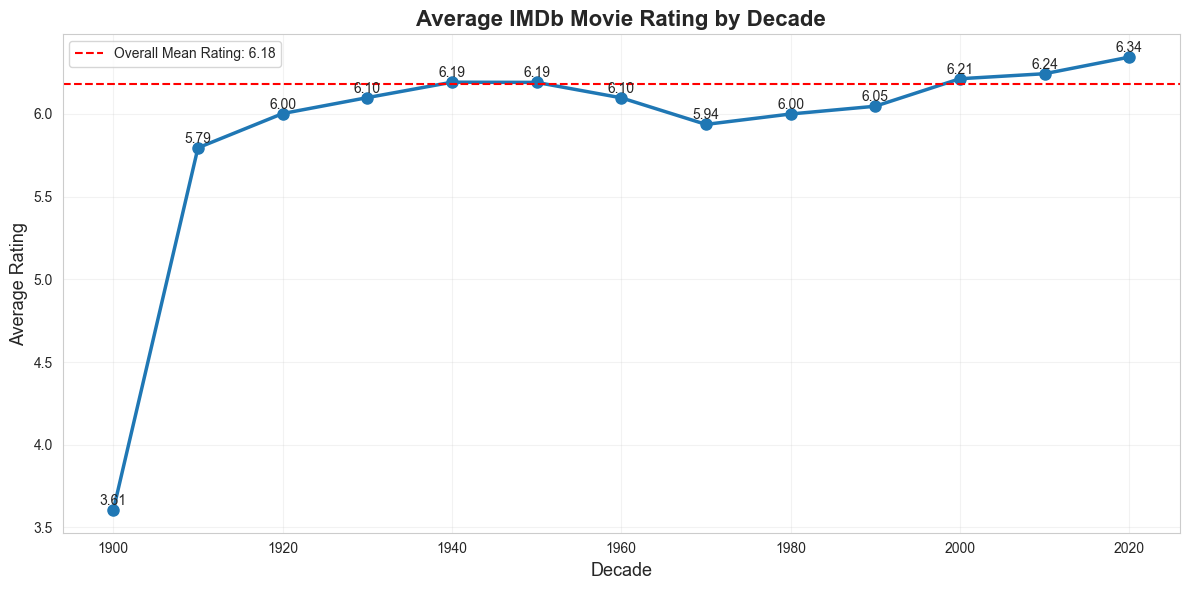


Mean Rating by Decade:
    decade  averageRating
1     1900       3.605072
2     1910       5.794729
3     1920       6.001699
4     1930       6.098000
5     1940       6.191239
6     1950       6.190069
7     1960       6.096779
8     1970       5.936169
9     1980       5.999048
10    1990       6.045939
11    2000       6.212147
12    2010       6.242513
13    2020       6.342822


In [27]:
# Compute average rating by decade
decade_ratings = (
    df.groupby('decade')['averageRating']
    .mean()
    .reset_index()
    .query("decade >= 1900")
)

plt.figure(figsize=(12,6))

plt.plot(
    decade_ratings['decade'], 
    decade_ratings['averageRating'], 
    marker='o', 
    markersize=8,
    linewidth=2.5, 
    color='#1f77b4',           # Professional blue
)

# Title and labels
plt.title("Average IMDb Movie Rating by Decade", fontsize=16, fontweight='bold')
plt.xlabel("Decade", fontsize=13)
plt.ylabel("Average Rating", fontsize=13)

# Add value labels on each point
for x, y in zip(decade_ratings['decade'], decade_ratings['averageRating']):
    plt.text(x, y + 0.03, f"{y:.2f}", ha='center', fontsize=10)

# Reference line = overall mean
overall_mean = df['averageRating'].mean()
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5,
            label=f'Overall Mean Rating: {overall_mean:.2f}')

plt.grid(True, alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()

print("\nMean Rating by Decade:")
print(decade_ratings)


##  Number of Movies per Decade
**Purpose**: Measures production growth  
**Insight**: Visualizes explosion of film output

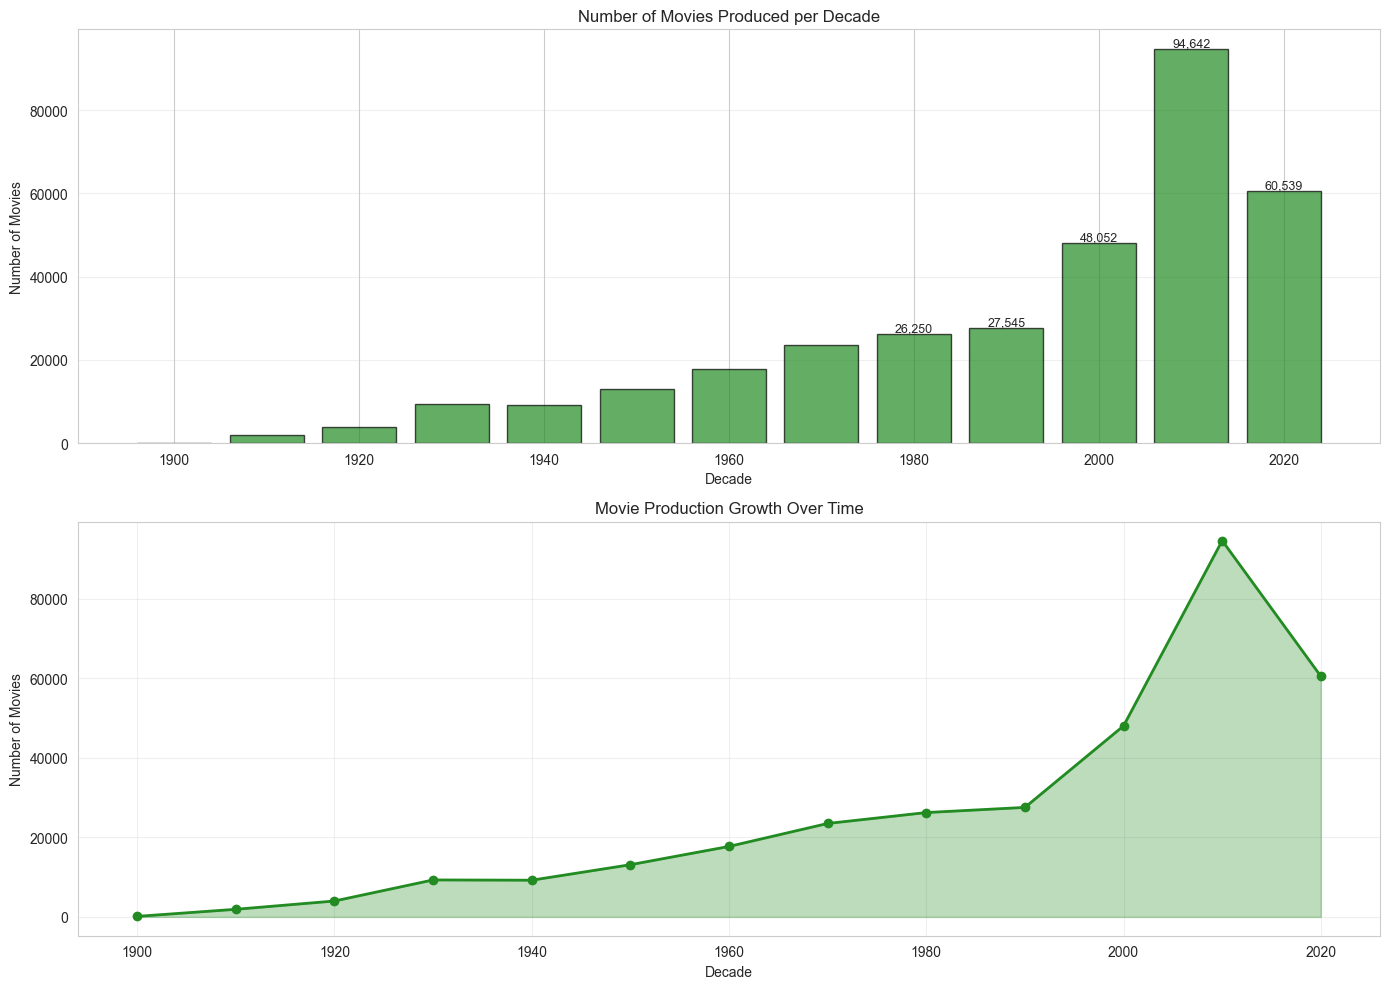

Movies per Decade:
        Count
decade       
1900      138
1910     1916
1920     4003
1930     9300
1940     9234
1950    13131
1960    17726
1970    23506
1980    26250
1990    27545
2000    48052
2010    94642
2020    60539

Total movies: 335,982
Peak decade: 2010 with 94,642 movies


In [17]:
# Count movies per decade
movies_per_decade = df['decade'].value_counts().sort_index()
movies_per_decade = movies_per_decade[movies_per_decade.index >= 1900]

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Bar chart
axes[0].bar(movies_per_decade.index, movies_per_decade.values, 
            width=8, edgecolor='black', alpha=0.7, color='forestgreen')
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Number of Movies')
axes[0].set_title('Number of Movies Produced per Decade')
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars for recent decades
for decade in movies_per_decade.index[-5:]:
    count = movies_per_decade[decade]
    axes[0].text(decade, count, f'{count:,}', ha='center', va='bottom', fontsize=9)

# Line chart with growth rate
axes[1].plot(movies_per_decade.index, movies_per_decade.values, 
             marker='o', linewidth=2, markersize=6, color='forestgreen')
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Number of Movies')
axes[1].set_title('Movie Production Growth Over Time')
axes[1].grid(True, alpha=0.3)
axes[1].fill_between(movies_per_decade.index, movies_per_decade.values, alpha=0.3, color='forestgreen')

plt.tight_layout()
plt.show()

print("Movies per Decade:")
print(movies_per_decade.to_frame(name='Count'))
print(f"\nTotal movies: {movies_per_decade.sum():,}")
print(f"Peak decade: {movies_per_decade.idxmax()} with {movies_per_decade.max():,} movies")

## Genre Evolution Over Time
**Purpose**: Combines genre + time  
**Insight**: Answers "how have genres changed in popularity?"

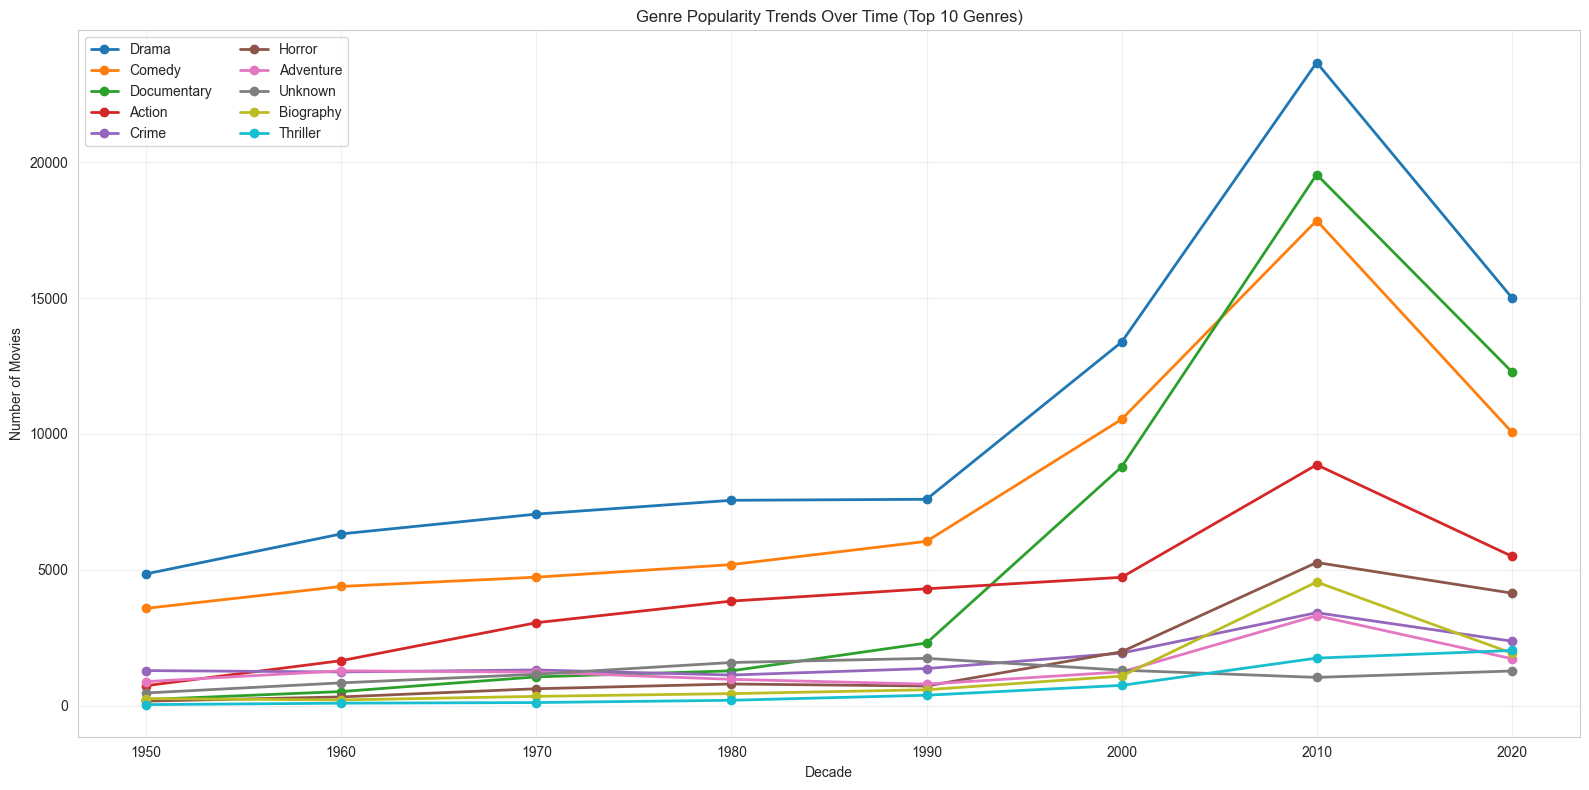

Genre counts by decade (Top 10 Genres, 1950 onwards):
decade        1950  1960  1970  1980  1990   2000   2010   2020
primaryGenre                                                   
Action         737  1657  3053  3849  4301   4724   8866   5502
Adventure      886  1282  1234   968   792   1242   3313   1730
Biography      260   210   342   443   585   1087   4551   1934
Comedy        3583  4389  4729  5192  6048  10539  17856  10073
Crime         1290  1241  1314  1127  1366   1933   3421   2374
Documentary    223   519  1059  1282  2305   8789  19551  12294
Drama         4852  6322  7051  7559  7596  13382  23673  15022
Horror         166   322   622   797   723   1983   5269   4142
Thriller        38    91   114   198   384    747   1750   2030
Unknown        467   839  1156  1588  1741   1306   1040   1276


In [18]:
# Create genre-decade crosstab (top 10 genres)
top_10_genres = df['primaryGenre'].value_counts().head(10).index
df_genre_time = df[df['primaryGenre'].isin(top_10_genres) & (df['decade'] >= 1950)]

genre_decade_counts = pd.crosstab(df_genre_time['primaryGenre'], df_genre_time['decade'])

plt.figure(figsize=(16, 8))

# Line plot showing trends
for genre in top_10_genres:
    genre_data = df_genre_time[df_genre_time['primaryGenre'] == genre]['decade'].value_counts().sort_index()
    plt.plot(genre_data.index, genre_data.values, marker='o', label=genre, linewidth=2)

plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.title('Genre Popularity Trends Over Time (Top 10 Genres)')
plt.legend(loc='best', ncol=2)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Genre counts by decade (Top 10 Genres, 1950 onwards):")
print(genre_decade_counts)


Correlation Analysis

Correlation Matrix:
                averageRating  numVotes  logVotes  runtimeMinutes  startYear  \
averageRating           1.000     0.062    -0.090           0.006      0.067   
numVotes                0.062     1.000     0.504           0.017      0.041   
logVotes               -0.090     0.504     1.000           0.035      0.051   
runtimeMinutes          0.006     0.017     0.035           1.000      0.015   
startYear               0.067     0.041     0.051           0.015      1.000   
numGenres              -0.066     0.172     0.390           0.011     -0.040   

                numGenres  
averageRating      -0.066  
numVotes            0.172  
logVotes            0.390  
runtimeMinutes      0.011  
startYear          -0.040  
numGenres           1.000  


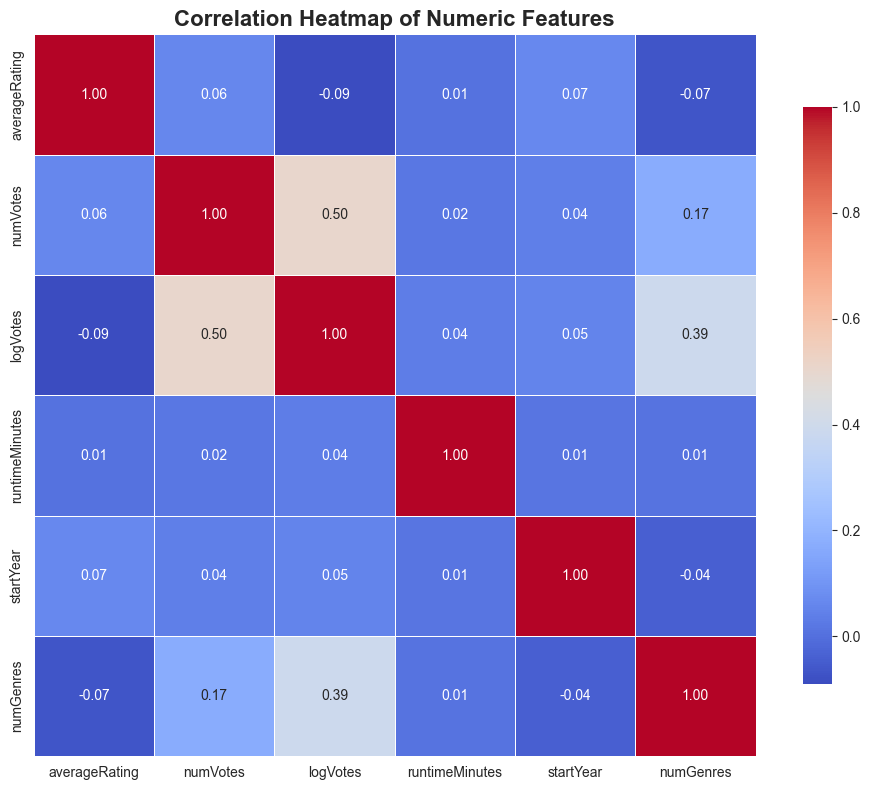


Key Correlations with Average Rating
startYear         0.067
numVotes          0.062
runtimeMinutes    0.006
numGenres        -0.066
logVotes         -0.090
Name: averageRating, dtype: float64


In [28]:
print("="*80)
print("Correlation Analysis")
print("="*80)

# Select numeric columns (ensure they exist in df)
numeric_cols = ['averageRating', 'numVotes', 'logVotes', 
                'runtimeMinutes', 'startYear', 'numGenres']

# Filter columns safely
numeric_cols = [col for col in numeric_cols if col in df.columns]

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr().round(3)

print("\nCorrelation Matrix:")
print(corr_matrix)

# Heatmap (clean, professional)
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    fmt=".2f",
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap of Numeric Features", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Key correlations with averageRating
print("\n" + "="*80)
print("Key Correlations with Average Rating")
print("="*80)

rating_corr = corr_matrix['averageRating'].sort_values(ascending=False)
print(rating_corr.drop('averageRating'))


## Summary & Key Insights

This EDA reveals several important patterns in the IMDB movies dataset:

### Key Findings:
1. **Rating Distribution**: Ratings typically peak around 6-7, showing a slight positive bias
2. **Popularity Skew**: Most movies receive relatively few votes, with a small number becoming extremely popular
3. **Quality-Popularity Relationship**: Correlation analysis shows the relationship between votes and ratings
4. **Genre Preferences**: Different genres show distinct rating patterns
5. **Temporal Trends**: Movie production and ratings have evolved significantly over decades
6. **Production Growth**: Exponential growth in film production, especially in recent decades
7. **Genre Evolution**: Genre popularity has shifted dramatically over time
8. **Runtime Effects**: Analysis shows how movie length relates to audience ratings